In [26]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

plt.style.use('default')
plt.rcParams['figure.figsize'] = [3.0,3.0]

df = pd.read_csv('data/train.csv',dtype={'tipodepropiedad':'category','ciudad':'category','provincia':'category'})
df['fecha'] = pd.to_datetime(df['fecha'])
df['anio de publicacion'] = df['fecha'].dt.year
df["mes de publicacion"] = df['fecha'].dt.month
df["dia de publicacion"] = df['fecha'].dt.day
df['preciousd'] = df['precio']/20

In [27]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,anio de publicacion,mes de publicacion,dia de publicacion,preciousd
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2273000.0,2015,8,23,113650.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,0.0,0.0,0.0,1.0,1.0,3600000.0,2013,6,28,180000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1200000.0,2015,10,17,60000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,0.0,0.0,0.0,1.0,1.0,650000.0,2012,3,9,32500.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1150000.0,2016,6,7,57500.0


# Analisis de los tipos de propiedades

In [28]:
propiedades_counts = df['tipodepropiedad'].value_counts()

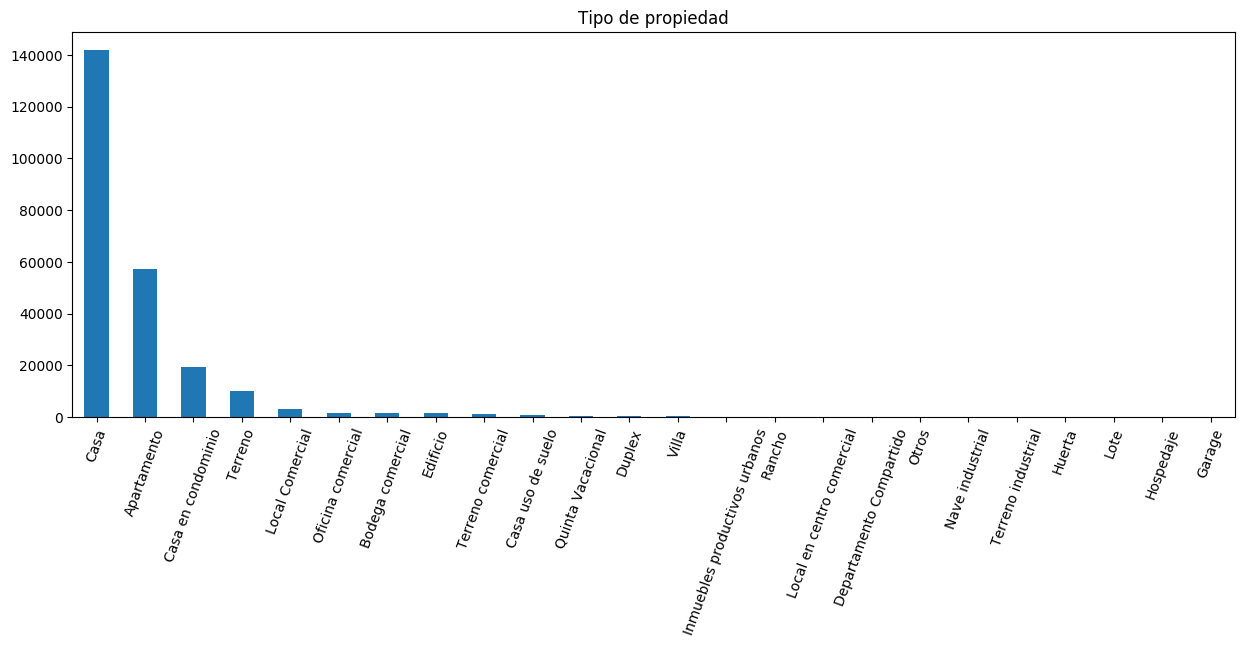

In [29]:
df.tipodepropiedad.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="Tipo de propiedad");

# Analisis por provincia

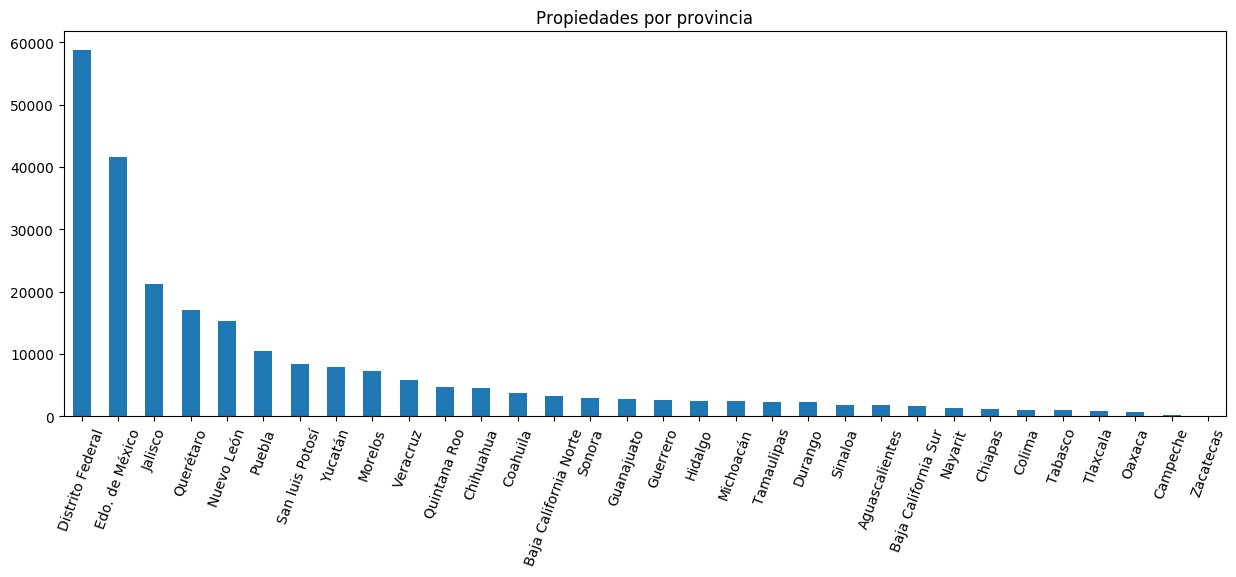

In [30]:
df.provincia.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="Propiedades por provincia");

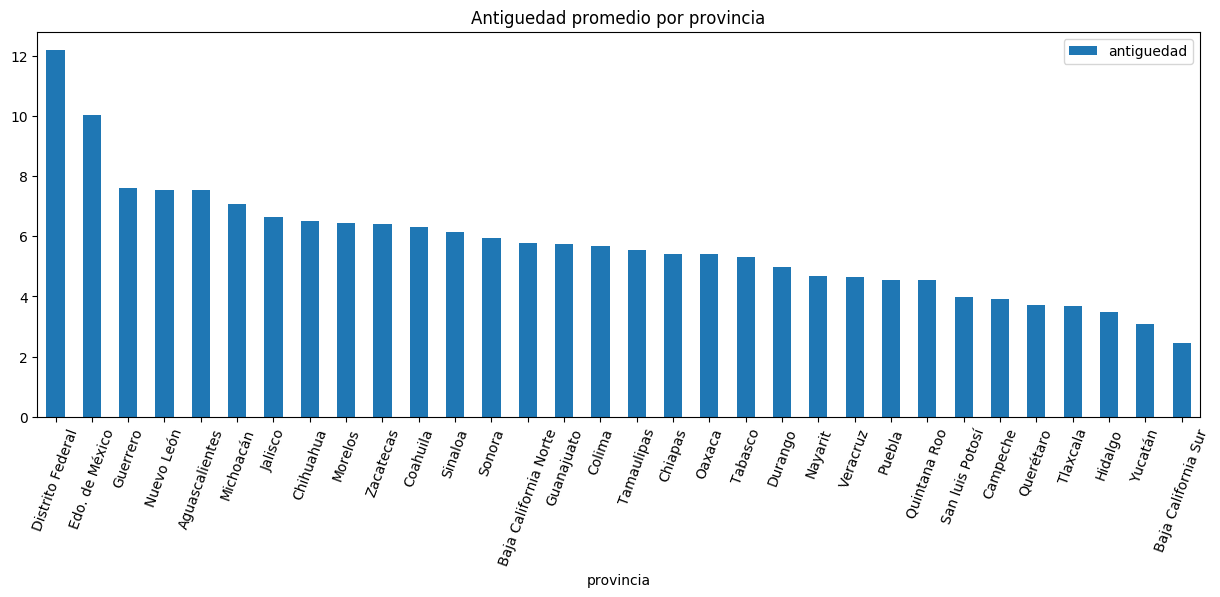

In [31]:
df.groupby('provincia').agg({'antiguedad': 'mean'})\
    .sort_values('antiguedad', ascending=False)\
    .plot(kind='bar', figsize=(15, 5), rot=70, title="Antiguedad promedio por provincia");

(12, -0.1)

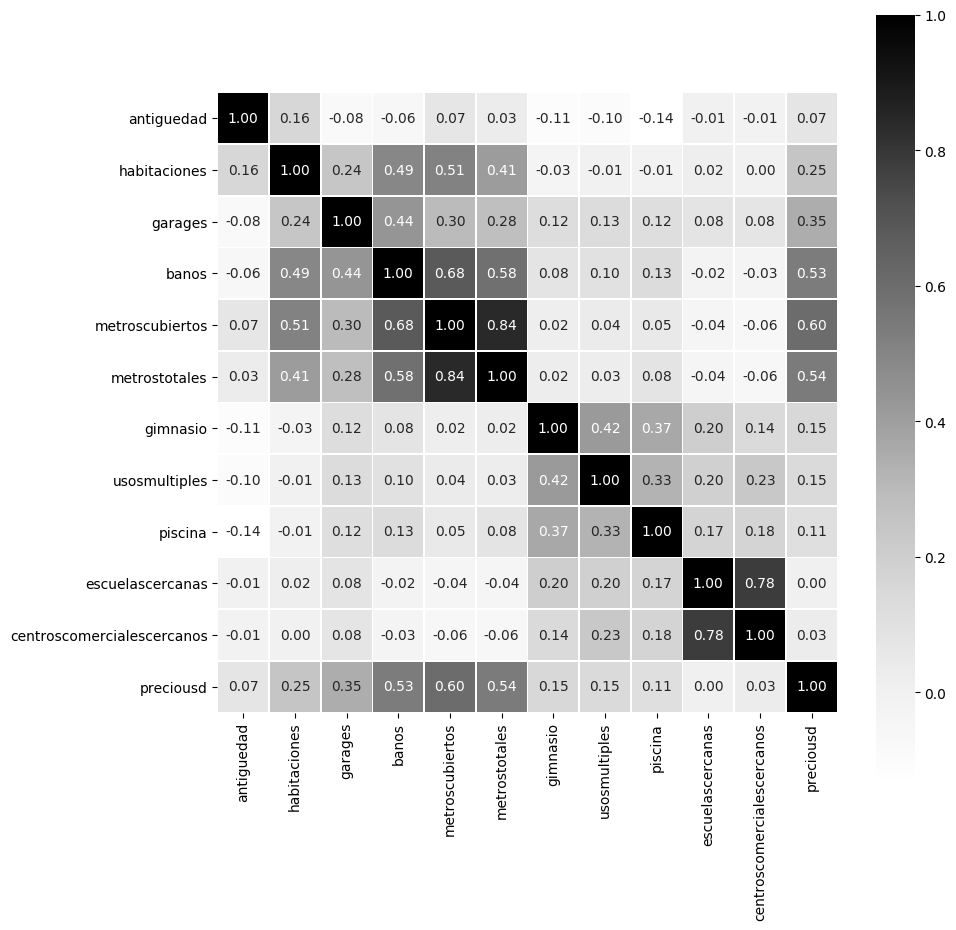

In [33]:
columns = ['antiguedad','habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales','gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos','preciousd']
corr = df
corr['metrostotales'].fillna(corr['metroscubiertos'], inplace=True)
corr['metroscubiertos'].fillna(corr['metrostotales'], inplace=True)
forheatmap = corr.loc[:, columns]
plt.figure(figsize=(10, 10))
sns.heatmap(forheatmap.corr(), square=True, annot=True, fmt='.2f', linewidths=.5,cmap="Greys").set_ylim(12,-0.1)

Del plot anterior se puede decir que a medida que tengo mas metros cubiertos, aumenta el valor, seguido de metros totales y banos. No tiene mucha importancia la piscina, los usos multiples y la antiguedad a la hora de ver el precio. Se puede ver como si aumentan los metros cubiertos, aumentan los baños mas que las habitaciones.


Text(0, 0.5, 'Porcentaje de error')

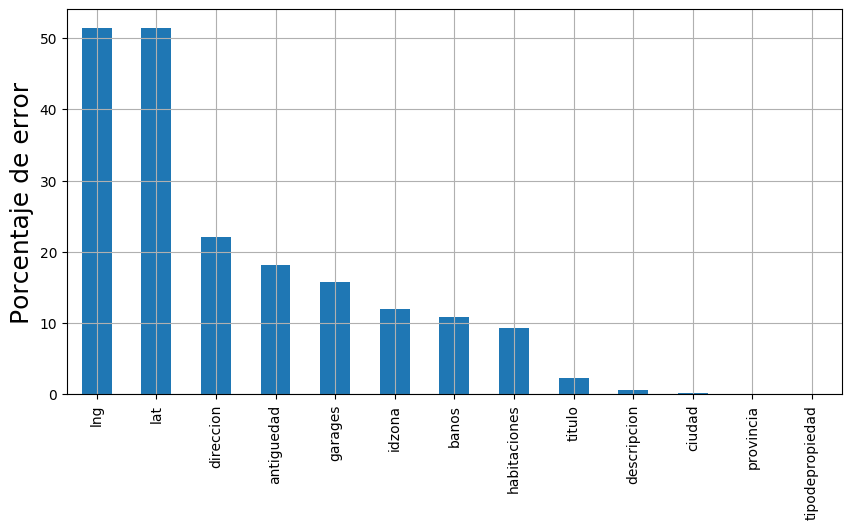

In [34]:
#Porcentaje de datos faltantes. eliminando los que tienen un 0%
errores_de_nan = (df.isnull().sum() / len(df)) * 100
errores_de_nan = errores_de_nan.drop(errores_de_nan[errores_de_nan == 0].index).sort_values(ascending=False)
errores_de_nan.plot(kind="bar",figsize=(10,5),grid=bool).set_ylabel("Porcentaje de error", fontsize=18)

# Analisis de habitaciones totales por propiedades
### Tomando como habitaciones totales = garage + habitaciones + baños

In [35]:
df["Tot Habitaciones"]= df["banos"].values+df["habitaciones"].values+df["garages"].values

Text(0, 0.5, 'Cantidad de propiedades')

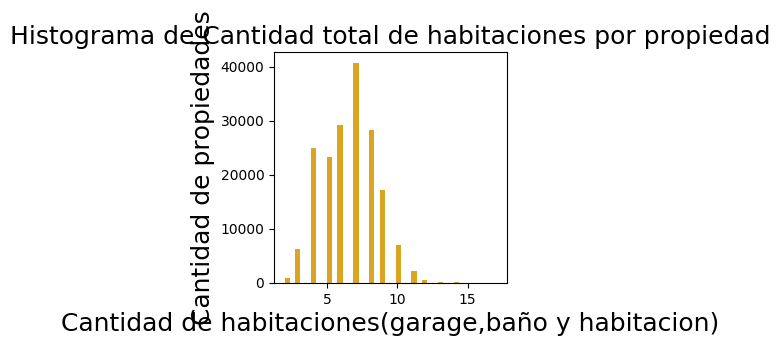

In [37]:
todo = df.loc[:,['tipodepropiedad',"Tot Habitaciones"] ]
g = todo['Tot Habitaciones'].plot.hist(bins=40, color='goldenrod')
g.set_title("Histograma de Cantidad total de habitaciones por propiedad", fontsize=18)
g.set_xlabel("Cantidad de habitaciones(garage,baño y habitacion)",fontsize=18)
g.set_ylabel("Cantidad de propiedades", fontsize=18)

Text(0, 0.5, 'Cantidad de casas')

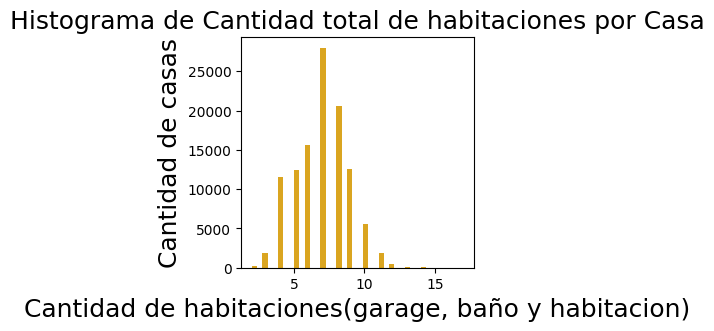

In [38]:
casa = df.loc[lambda x:x['tipodepropiedad'] == "Casa",["Tot Habitaciones"] ]
g = casa['Tot Habitaciones'].plot.hist(bins=40, color='goldenrod')
g.set_title("Histograma de Cantidad total de habitaciones por Casa", fontsize=18)
g.set_xlabel("Cantidad de habitaciones(garage, baño y habitacion)",fontsize=18)
g.set_ylabel("Cantidad de casas", fontsize=18)

Text(0, 0.5, 'Cantidad de Apartamentos')

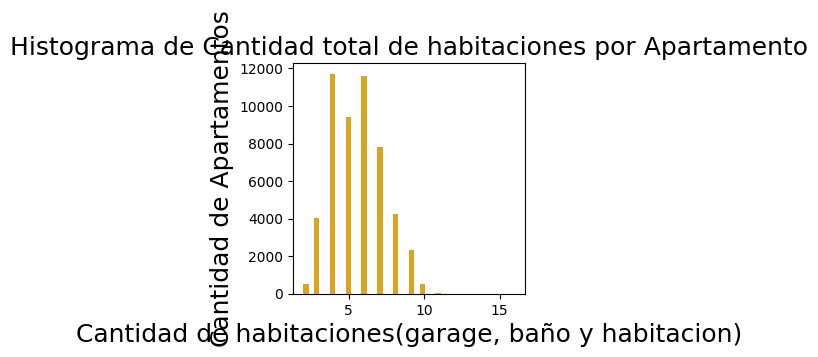

In [39]:
apart = df.loc[lambda x:x['tipodepropiedad'] == "Apartamento",["Tot Habitaciones"] ]
g = apart['Tot Habitaciones'].plot.hist(bins=40, color='goldenrod')
g.set_title("Histograma de Cantidad total de habitaciones por Apartamento", fontsize=18)
g.set_xlabel("Cantidad de habitaciones(garage, baño y habitacion)",fontsize=18)
g.set_ylabel("Cantidad de Apartamentos", fontsize=18)

Text(0, 0.5, 'Cantidad de propiedades')

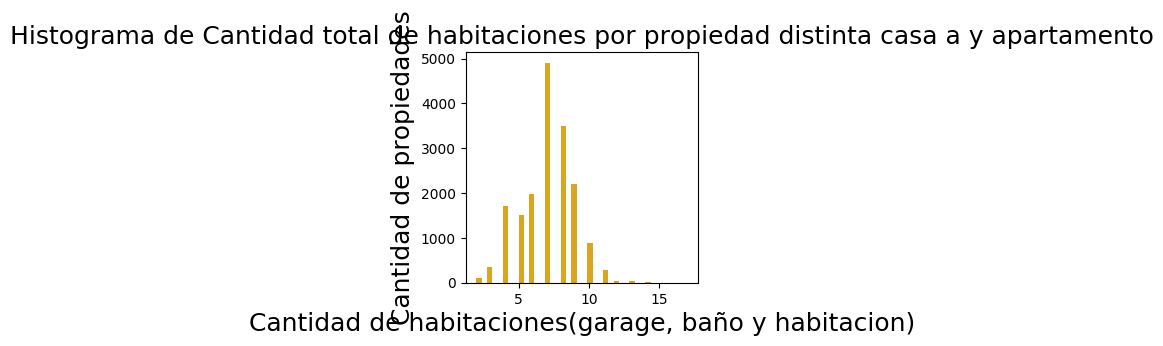

In [40]:
#Nose como usar condicionales con lambda (x[algo] != a dos cosas)
otros = df.loc[lambda x: x['tipodepropiedad'] != "Apartamento",:]
otros = otros.loc[lambda x: x['tipodepropiedad'] !="Casa" ,["Tot Habitaciones"]]
g = otros['Tot Habitaciones'].plot.hist(bins=40, color='goldenrod')
g.set_title("Histograma de Cantidad total de habitaciones por propiedad distinta casa a y apartamento", fontsize=18)
g.set_xlabel("Cantidad de habitaciones(garage, baño y habitacion)",fontsize=18)
g.set_ylabel("Cantidad de propiedades", fontsize=18)

Amplio el mes 12 del 2016 para ver como se comporta en ese momento